# Instalar libs

In [5]:
# !pip install memoizit
# !pip install memoizit[redis]
# !pip install redis
# !pip install redis[hiredis]

# Importar Configurar Memoizit + Redis

In [6]:
import redis
import time
import random
from memoizit import Memoizer
from itertools import combinations
from IPython.display import display_markdown
import numpy as np

m = Memoizer(
    backend="redis",
    host="localhost",
    port="6379"    
)

In [7]:
@m.memoize(
    expiration=60*60*24
)
def knapsack(capacidade_maxima, pesos, valores, n):
    # Inicializando uma matriz para armazenar os valores máximos possíveis
    # para diferentes capacidades e número de itens
    dp = [[0] * (capacidade_maxima + 1) for _ in range(n + 1)] # Gera n + 1 elementos contendo array de zeros de 0 até capacidade máxima

    # Preenchendo a matriz dp usando a abordagem de programação dinâmica
    for i in range(1, n + 1):
        peso_item = pesos[i - 1]
        valor_item = valores[i - 1]
        for capacidade_atual in range(1, capacidade_maxima + 1):
            if peso_item <= capacidade_atual:
                # Se o peso do item for menor ou igual à capacidade atual,
                # podemos considerar incluir o item na mochila
                dp[i][capacidade_atual] = max(dp[i - 1][capacidade_atual],
                                              dp[i - 1][capacidade_atual - peso_item] + valor_item)
            else:
                # Se o peso do item for maior que a capacidade atual,
                # não podemos incluir o item na mochila
                dp[i][capacidade_atual] = dp[i - 1][capacidade_atual]

    # O valor máximo estará na célula dp[n][capacidade_maxima]
    valor_maximo = dp[n][capacidade_maxima]

    # Reconstruindo a lista de itens selecionados
    itens_selecionados = []
    capacidade_restante = capacidade_maxima
    for i in range(n, 0, -1):
        if dp[i][capacidade_restante] != dp[i - 1][capacidade_restante]:
            itens_selecionados.append(i - 1)
            capacidade_restante -= pesos[i - 1]

    return valor_maximo, itens_selecionados, dp


# Exemplo padrão

In [8]:
# Exemplo de uso
items = [
    (15, 15, 'Saco de dormir'),
    (3, 7, 'Corda'),
    (2, 10, 'Canivete'),
    (5, 5, 'Tocha'),
    (9, 8, 'Garrafa'),
    (20, 17, 'Comida'),
]

capacidade_maxima = 30
pesos = [_[0] for _ in items]
valores = [_[1] for _ in items]
n = len(pesos)

# Inicia a contagem do tempo
start_time = time.time()

max_valor, itens_selecionados, itens_analisados = knapsack(capacidade_maxima, pesos, valores, n)

# Finaliza a contagem do tempo
end_time = time.time()

# Calcula o tempo de execução
execution_time = end_time - start_time

# Exibe o tempo de execução
print("Tempo de execução:", execution_time, "segundos")

print("Valor máximo:", max_valor)
print("Itens selecionados:", itens_selecionados)



Tempo de execução: 0.0 segundos
Valor máximo: 40
Itens selecionados: [4, 2, 1, 0]


In [9]:
data = []
combinacoes = [list(combinations(map(lambda x: x[2], items), _)) for _ in range(1, len(items) + 1)]
peso_valor_produtos = { _[2] : { "peso": _[0], "valor": _[1] } for _ in items }
produtos_selecionados = [items[i][2] for i in itens_selecionados]
produtos_selecionados.sort()

id_combinacao_produto_chave_escolhido = None

output = "# Combinação Produtos"

for combinacao in enumerate(combinacoes):
   id_combinacao, combinacoes_produtos = combinacao
   
   for cp in enumerate(combinacoes_produtos):
      id_combinacao_produto, produtos = cp
      id_combinacao_produto_chave = f"{id_combinacao:03d}{id_combinacao_produto:03d}"

      produtos_list = list(produtos)
      produtos_list.sort()

      if produtos_list == produtos_selecionados:
         id_combinacao_produto_chave_escolhido = id_combinacao_produto_chave

      del produtos_list

      for p in produtos:
         data.append(
            (
               p,
               id_combinacao_produto_chave,
            )
         )

nome_cenarios = list(set([_ for _ in map(lambda i: i[1], data)]))
nome_cenarios.sort()

produtos = list(set([_ for _ in map(lambda i: i[0], data)]))
produtos.sort()

matriz = [[p] + [
   (c, 
    True if p in map(lambda i: i[0], filter(lambda i: i[1] == c, data)) else False) 
    for c in nome_cenarios] 
    for p in produtos]

coluna_cenario_escolhido = nome_cenarios.index(id_combinacao_produto_chave_escolhido)

total = np.array([[0] * len(nome_cenarios)] * 2)

output += f"\nMelhor combinação: <a>C_{coluna_cenario_escolhido}</a>\n"
output += f"\nProdutos: { ','.join(produtos_selecionados) }\n"

output += "\n|" + "|".join([" Produto "] + [f" *<a>C_{c[0]}</a>* " if c[0] == coluna_cenario_escolhido else f" C_{c[0]} " for c in enumerate(nome_cenarios)]) + "|"
output += "\n|" + "|".join(["---------"] + ["-".join(([''] * (len(c) + 4))) for c in enumerate(nome_cenarios)]) + "|"

for m in matriz:
   peso, valor = peso_valor_produtos[m[0]]["peso"], peso_valor_produtos[m[0]]["valor"]
   output += "\n|" + "|".join([m[0]] + [f"<center>{peso}</center>" if i[1] else "" for i in m[1:]]) + "|"

   total_peso = [peso if i[1] else 0 for i in m[1:]]
   total_valor = [valor if i[1] else 0 for i in m[1:]]

   total = total + np.array([total_peso, total_valor])

output += "\n|" + "|".join(["<b>Peso</b>"] + [f"<b><center>{i}</center></b>" for i in total[0]]) + "|"
output += "\n|" + "|".join(["<b>Valor</b>"] + [f"<b><center>{i}</center></b>" for i in total[1]]) + "|"

display_markdown(output, raw=True)


# Combinação Produtos
Melhor combinação: <a>C_42</a>

Produtos: Canivete,Corda,Garrafa,Saco de dormir

| Produto | C_0 | C_1 | C_2 | C_3 | C_4 | C_5 | C_6 | C_7 | C_8 | C_9 | C_10 | C_11 | C_12 | C_13 | C_14 | C_15 | C_16 | C_17 | C_18 | C_19 | C_20 | C_21 | C_22 | C_23 | C_24 | C_25 | C_26 | C_27 | C_28 | C_29 | C_30 | C_31 | C_32 | C_33 | C_34 | C_35 | C_36 | C_37 | C_38 | C_39 | C_40 | C_41 | *<a>C_42</a>* | C_43 | C_44 | C_45 | C_46 | C_47 | C_48 | C_49 | C_50 | C_51 | C_52 | C_53 | C_54 | C_55 | C_56 | C_57 | C_58 | C_59 | C_60 | C_61 | C_62 |
|---------|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
|Canivete|||<center>2</center>|||||<center>2</center>||||<center>2</center>||||<center>2</center>|<center>2</center>|<center>2</center>||||<center>2</center>||||<center>2</center>|<center>2</center>|<center>2</center>||||<center>2</center>|<center>2</center>|<center>2</center>||||<center>2</center>|<center>2</center>|<center>2</center>||<center>2</center>|<center>2</center>|<center>2</center>||||<center>2</center>|<center>2</center>|<center>2</center>||<center>2</center>|<center>2</center>|<center>2</center>||<center>2</center>|<center>2</center>|<center>2</center>|<center>2</center>||<center>2</center>|<center>2</center>|<center>2</center>|
|Comida||||||<center>20</center>|||||<center>20</center>||||<center>20</center>|||<center>20</center>||<center>20</center>|<center>20</center>||||<center>20</center>|||<center>20</center>||<center>20</center>|<center>20</center>|||<center>20</center>||<center>20</center>|<center>20</center>||<center>20</center>|<center>20</center>|<center>20</center>|||<center>20</center>||<center>20</center>|<center>20</center>||<center>20</center>|<center>20</center>|<center>20</center>||<center>20</center>|<center>20</center>|<center>20</center>|<center>20</center>||<center>20</center>|<center>20</center>|<center>20</center>|<center>20</center>|<center>20</center>|<center>20</center>|
|Corda||<center>3</center>|||||<center>3</center>|||||<center>3</center>|<center>3</center>|<center>3</center>|<center>3</center>|||||||<center>3</center>|<center>3</center>|<center>3</center>|<center>3</center>|||||||<center>3</center>|<center>3</center>|<center>3</center>|<center>3</center>|<center>3</center>|<center>3</center>|||||<center>3</center>|<center>3</center>|<center>3</center>|<center>3</center>|<center>3</center>|<center>3</center>|||||<center>3</center>|<center>3</center>|<center>3</center>|<center>3</center>||<center>3</center>|<center>3</center>|<center>3</center>|<center>3</center>||<center>3</center>|<center>3</center>|
|Garrafa|||||<center>9</center>|||||<center>9</center>||||<center>9</center>|||<center>9</center>||<center>9</center>||<center>9</center>|||<center>9</center>|||<center>9</center>||<center>9</center>||<center>9</center>||<center>9</center>||<center>9</center>||<center>9</center>|<center>9</center>||<center>9</center>|<center>9</center>||<center>9</center>||<center>9</center>||<center>9</center>|<center>9</center>||<center>9</center>|<center>9</center>|<center>9</center>||<center>9</center>|<center>9</center>|<center>9</center>|<center>9</center>||<center>9</center>|<center>9</center>|<center>9</center>|<center>9</center>|<center>9</center>|
|Saco de dormir|<center>15</center>||||||<center>15</center>|<center>15</center>|<center>15</center>|<center>15</center>|<center>15</center>|||||||||||<center>15</center>|<center>15</center>|<center>15</center>|<center>15</center>|<center>15</center>|<center>15</center>|<center>15</center>|<center>15</center>|<center>15</center>|<center>15</center>|||||||||||<center>15</center>|<center>15</center>|<center>15</center>|<center>15</center>|<center>15</center>|<center>15</center>|<center>15</center>|<center>15</center>|<center>15</center>|<center>15</center>||||||<center>15</center>|<center>15</center>|<center>15</center>|<center>15</center>|<center>15</center>||<center>15</center>|
|Tocha||||<center>5</center>|||||<center>5</center>||||<center>5</center>|||<center>5</center>|||<center>5</center>|<center>5</center>|||<center>5</center>|||<center>5</center>|||<center>5</center>|<center>5</center>||<center>5</center>|||<center>5</center>|<center>5</center>||<center>5</center>|<center>5</center>||<center>5</center>|<center>5</center>|||<center>5</center>|<center>5</center>||<center>5</center>|<center>5</center>||<center>5</center>|<center>5</center>|<center>5</center>||<center>5</center>|<center>5</center>|<center>5</center>|<center>5</center>||<center>5</center>|<center>5</center>|<center>5</center>|<center>5</center>|
|<b>Peso</b>|<b><center>15</center></b>|<b><center>3</center></b>|<b><center>2</center></b>|<b><center>5</center></b>|<b><center>9</center></b>|<b><center>20</center></b>|<b><center>18</center></b>|<b><center>17</center></b>|<b><center>20</center></b>|<b><center>24</center></b>|<b><center>35</center></b>|<b><center>5</center></b>|<b><center>8</center></b>|<b><center>12</center></b>|<b><center>23</center></b>|<b><center>7</center></b>|<b><center>11</center></b>|<b><center>22</center></b>|<b><center>14</center></b>|<b><center>25</center></b>|<b><center>29</center></b>|<b><center>20</center></b>|<b><center>23</center></b>|<b><center>27</center></b>|<b><center>38</center></b>|<b><center>22</center></b>|<b><center>26</center></b>|<b><center>37</center></b>|<b><center>29</center></b>|<b><center>40</center></b>|<b><center>44</center></b>|<b><center>10</center></b>|<b><center>14</center></b>|<b><center>25</center></b>|<b><center>17</center></b>|<b><center>28</center></b>|<b><center>32</center></b>|<b><center>16</center></b>|<b><center>27</center></b>|<b><center>31</center></b>|<b><center>34</center></b>|<b><center>25</center></b>|<b><center>29</center></b>|<b><center>40</center></b>|<b><center>32</center></b>|<b><center>43</center></b>|<b><center>47</center></b>|<b><center>31</center></b>|<b><center>42</center></b>|<b><center>46</center></b>|<b><center>49</center></b>|<b><center>19</center></b>|<b><center>30</center></b>|<b><center>34</center></b>|<b><center>37</center></b>|<b><center>36</center></b>|<b><center>34</center></b>|<b><center>45</center></b>|<b><center>49</center></b>|<b><center>52</center></b>|<b><center>51</center></b>|<b><center>39</center></b>|<b><center>54</center></b>|
|<b>Valor</b>|<b><center>15</center></b>|<b><center>7</center></b>|<b><center>10</center></b>|<b><center>5</center></b>|<b><center>8</center></b>|<b><center>17</center></b>|<b><center>22</center></b>|<b><center>25</center></b>|<b><center>20</center></b>|<b><center>23</center></b>|<b><center>32</center></b>|<b><center>17</center></b>|<b><center>12</center></b>|<b><center>15</center></b>|<b><center>24</center></b>|<b><center>15</center></b>|<b><center>18</center></b>|<b><center>27</center></b>|<b><center>13</center></b>|<b><center>22</center></b>|<b><center>25</center></b>|<b><center>32</center></b>|<b><center>27</center></b>|<b><center>30</center></b>|<b><center>39</center></b>|<b><center>30</center></b>|<b><center>33</center></b>|<b><center>42</center></b>|<b><center>28</center></b>|<b><center>37</center></b>|<b><center>40</center></b>|<b><center>22</center></b>|<b><center>25</center></b>|<b><center>34</center></b>|<b><center>20</center></b>|<b><center>29</center></b>|<b><center>32</center></b>|<b><center>23</center></b>|<b><center>32</center></b>|<b><center>35</center></b>|<b><center>30</center></b>|<b><center>37</center></b>|<b><center>40</center></b>|<b><center>49</center></b>|<b><center>35</center></b>|<b><center>44</center></b>|<b><center>47</center></b>|<b><center>38</center></b>|<b><center>47</center></b>|<b><center>50</center></b>|<b><center>45</center></b>|<b><center>30</center></b>|<b><center>39</center></b>|<b><center>42</center></b>|<b><center>37</center></b>|<b><center>40</center></b>|<b><center>45</center></b>|<b><center>54</center></b>|<b><center>57</center></b>|<b><center>52</center></b>|<b><center>55</center></b>|<b><center>47</center></b>|<b><center>62</center></b>|

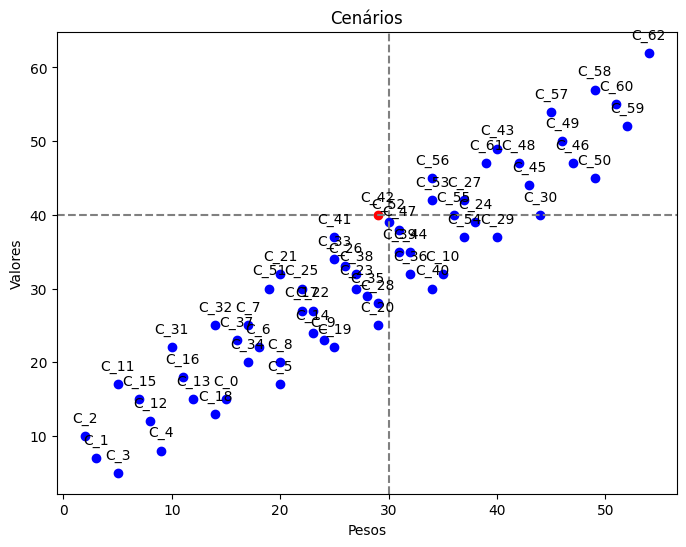

In [30]:
import matplotlib.pyplot as plt
import numpy as np

nome_cenarios = [f"C_{_[0]}" for _ in enumerate(nome_cenarios)]
pesos = total[0]
valores = total[1]

plt.figure(figsize=(8, 6))

for i, txt in enumerate(nome_cenarios):
    cor = 'red' if i == coluna_cenario_escolhido else 'blue'
    plt.scatter(pesos[i], valores[i], color=cor)
    plt.annotate(txt, (pesos[i], valores[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Pesos')
plt.ylabel('Valores')
plt.title('Cenários')

plt.axvline(30, color='gray', linestyle='--')  # Adiciona linha vertical em x=0
plt.axhline(valores[coluna_cenario_escolhido], color='gray', linestyle='--')  # Adiciona linha vertical em x=0

plt.show()
